### Here we ayalyze the workload imbalance of long running batch jobs

In [1]:
import numpy as np
import pandas as pd 

In [2]:
ce = pd.read_csv("D:/Files/2019 Spring/High P Com/Project/trace_201708/trace_201708/container_event.csv")

In [3]:
ce.head()

,ts,event,instance_id,machine_id,plan_cpu,plan_mem,plan_disk,cpuset
0,0,Create,10000,934,4,0.042409,0.034085,40|41|42|43
1,0,Create,1000,1295,8,0.084819,0.056809,56|57|58|59|60|61|62|63
2,0,Create,10001,668,8,0.084819,0.056809,24|25|26|27|28|29|30|31
3,0,Create,10002,1217,8,0.084819,0.056809,4|5|6|7|8|9|10|11
4,0,Create,10003,1019,4,0.042409,0.034085,36|37|38|39


In [4]:
ce_instance_id = np.sort(ce.instance_id)
ce_instance_id

array([    2,     3,     4, ..., 11273, 11274, 11275], dtype=int64)

In [5]:
ce_machine_id = np.sort(ce.machine_id)
ce_machine_id

array([   1,    1,    1, ..., 1313, 1313, 1313], dtype=int64)

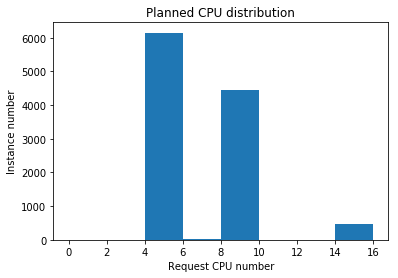

In [8]:
import matplotlib.pyplot as plt
import os.path
ce_plan_cpu = np.sort(ce.plan_cpu)
ce_plan_cpu
plt.hist(ce_plan_cpu, bins =  [0,2,4,6,8,10,12,14,16]) 
plt.title("Planned CPU distribution") 
plt.ylabel("Instance number")
plt.xlabel("Request CPU number")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'Planned CPU distribution.png')
plt.savefig(filename, dpi=300)
plt.show()

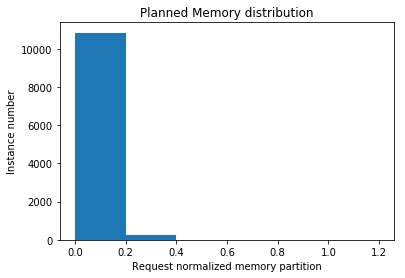

In [9]:
ce_plan_mem = np.sort(ce.plan_mem)
ce_plan_mem
plt.hist(ce_plan_mem, bins =  [0,0.2,0.4,0.6,0.8,1.0,1.2]) 
plt.title("Planned Memory distribution") 
plt.ylabel("Instance number")
plt.xlabel("Request normalized memory partition")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'Planned Memory distribution.png')
plt.savefig(filename, dpi=300)
plt.show()

In [10]:
reserve_cpu_num = {}
for m_id in ce_machine_id:
    reserve_cpu_num[m_id] = sum(ce[ce.machine_id == m_id].plan_cpu)

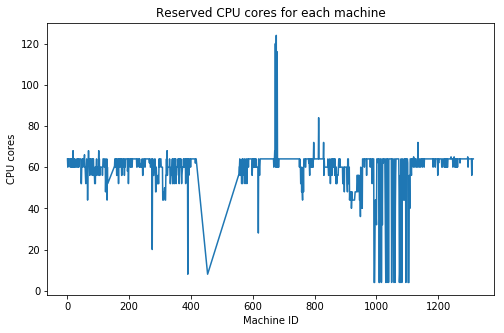

In [11]:
import matplotlib.pyplot as plt
import os.path
plt.figure(figsize=[8,5])

#plot each machine reserved CPU number
lists = sorted(reserve_cpu_num.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu_number = [z for z in y]
machine_id = [z for z in x]
plt.title("Reserved CPU cores for each machine")
plt.ylabel("CPU cores")
plt.xlabel("Machine ID")
plt.plot(machine_id, cpu_number, label="cpu number")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'reserve_CPU_cores.png')
plt.savefig(filename, dpi=300)
plt.show()

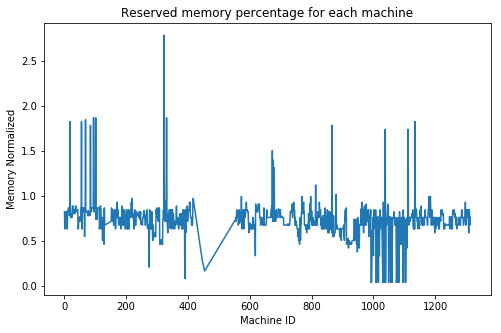

In [12]:
reserve_mem = {}
for m_id in ce_machine_id:
    reserve_mem[m_id] = sum(ce[ce.machine_id == m_id].plan_mem)
    
import matplotlib.pyplot as plt
import os.path
plt.figure(figsize=[8,5])

#plot each machine reserved memory percentage 
lists = sorted(reserve_mem.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
mem_precent = [z for z in y]
machine_id = [z for z in x]
plt.title("Reserved memory percentage for each machine")
plt.ylabel("Memory Normalized")
plt.xlabel("Machine ID")
plt.plot(machine_id, mem_precent, label="memory percentage")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'reserve_memory.png')
plt.savefig(filename, dpi=300)
plt.show()

#### From the above two plot figures, we can find reserved CPU cores and memory are vary in different machines. Some machines have been reserved over burdern recourse but some are under burdern

In [13]:
cu = pd.read_csv("D:/Files/2019 Spring/High P Com/Project/trace_201708/trace_201708/container_usage.csv")
cu.head()

,ts,instance_id,cpu_util,mem_util,disk_util,load1,load5,load15,avg_cpi,avg_mpki,max_cpi,max_mpki
0,42900,106,42.84,65.52,17.14,3.14,3.40,3.66,0.064628,0.034337,0.726102,0.457576
1,42600,107,3.30,24.00,5.20,0.54,0.38,0.30,0.155430,0.550153,2.211467,12.187318
2,42300,108,3.14,25.60,10.60,0.08,0.14,0.20,0.199342,0.294852,2.633724,3.997216
3,42000,109,3.82,42.00,13.90,0.10,0.16,0.20,0.238470,0.292426,2.203077,2.942878
4,41700,110,5.82,24.90,7.40,0.74,0.62,0.60,0.136100,0.161496,1.622428,2.469633


In [28]:
instanceid = np.sort(cu[cu.ts == 42600].instance_id)
instanceid

array([    1,     2,     3, ..., 11271, 11273, 11275], dtype=int64)

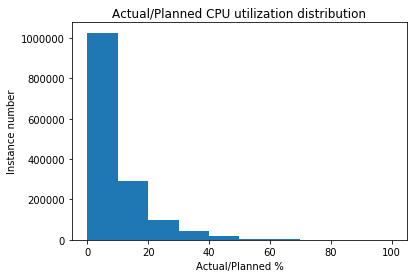

In [14]:
cu_cpu_util = np.sort(cu.cpu_util)
plt.hist(cu_cpu_util, bins =  [0,10,20,30,40,50,60,70,80,90,100]) 
plt.title("Actual/Planned CPU utilization distribution") 
plt.ylabel("Instance number")
plt.xlabel("Actual/Planned %")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'Actual_Planned CPU utilization.png')
plt.savefig(filename, dpi=300)
plt.show()

In [15]:
max(cu_cpu_util)

98.9199996948184

In [16]:
min(cu_cpu_util)

0.3000000044700026

In [17]:
cu_mem_util = np.sort(cu.mem_util)
max(cu_mem_util)

78.24999809262772

In [18]:
min(cu_mem_util)

0.5

In [21]:
instance_id = np.sort(cu.instance_id)
instance_id

array([    1,     1,     1, ..., 11275, 11275, 11275], dtype=int64)

In [24]:
timestamps = np.sort(cu.ts)
timestamps

array([39600, 39600, 39600, ..., 82500, 82500, 82500], dtype=int64)

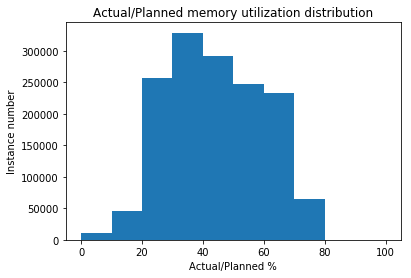

In [19]:
plt.hist(cu_mem_util, bins =  [0,10,20,30,40,50,60,70,80,90,100]) 
plt.title("Actual/Planned memory utilization distribution") 
plt.ylabel("Instance number")
plt.xlabel("Actual/Planned %")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'Actual_Planned memory utilization.png')
plt.savefig(filename, dpi=300)
plt.show()

#### take very long time to run 

In [26]:
cu_load_1min = np.sort(cu.load1)
cu_load_1min_max = {}
for ts in timestamps:
    cu_load_1min_max[ts] = max(cu[cu.ts == ts].load1)
cu_load_1min_avg = {}
for ts in timestamps:
    cu_load_1min_avg[ts] = sum(cu[cu.ts == ts].load1) / 11275 

KeyboardInterrupt: 

In [ ]:
cu_load_5min = np.sort(cu.load5)
cu_load_5min_max = {}
for ts in timestamps:
    cu_load_5min_max[ts] = max(cu[cu.ts == ts].load5)
cu_load_5min_avg = {}
for ts in timestamps:
    cu_load_5min_avg[ts] = sum(cu[cu.ts == ts].load5) / 11275 

In [ ]:
cu_load_15min = np.sort(cu.load15)
cu_load_15min_max = {}
for ts in timestamps:
    cu_load_15min_max[ts] = max(cu[cu.ts == ts].load15)
cu_load_15min_avg = {}
for ts in timestamps:
    cu_load_15min_avg[ts] = sum(cu[cu.ts == ts].load15) / 11275 